# References

https://www.cs.purdue.edu/homes/lsi/sigir04-cf-norm.pdf

http://www.cs.rochester.edu/twiki/pub/Main/HarpSeminar/Factorization_Meets_the_Neighborhood-_a_Multifaceted_Collaborative_Filtering_Model.pdf

https://www.cs.purdue.edu/homes/lsi/sigir04-cf-norm.pdf

# Baseline estimates

Typical Collaborative Filtering (CF) data exhibit large user and item effects; systematic
tendencies for some users to give higher ratings than others,
and for some items to receive higher ratings than others. It is customary
to adjust the data by accounting for these effects, which we encapsulate 
within the baseline estimates. Denote by $\mu$ the overall
average rating. A baseline estimate for an unknown rating $r_{ui}$ is
denoted by $b_{ui}$ and accounts for the user and item effects:

\begin{equation*}
b_{u,i} = \mu + b_u + b_i
\end{equation*}

The parameters $b_u$ and $b_i$ indicate the observer deviations of user $u$ and item $i$ respectively, 
from the average. For example, suppose
that we want a baseline estimate for the rating of the movie Titanic
by user Joe. Now, say that the average rating over all movies, µ, is
3.7 stars. Furthermore, Titanic is better than an average movie, so it
tends to be rated 0.5 stars above the average. On the other hand, Joe
is a critical user, who tends to rate 0.3 stars lower than the average.
Thus, the baseline estimate for Titanic’s rating by Joe would be 3.9
stars by calculating 3.7 − 0.3+0.5. In order to estimate bu and bi
one can solve the least squares problem:

\begin{equation*}
min_{b_{*}} \sum_{(u,i)\subset K} (r_{u,i} - \mu - b_u - b_i)^{2}
\end{equation*}

Here, the first term $\sum_{(u,i)\subset K} (r_{u,i} - \mu - b_u - b_i)^{2}$ strives to find $b_u$'s and $b_i$'s that fit the given ratings. 

The problem can be formalized as the following (assuming there are $M$ users and $N$ movies) : 

\begin{equation*}
r_{0, 0} = \mu + (b_{u_{0}} \cdot 1 + b_{u_{1}} \cdot 0 + b_{u_{2}} \cdot 0 + ... + b_{u_{M}} \cdot 0) + (b_{i_{0}} \cdot 1 + b_{i_{1}} \cdot 0 + b_{i_{2}} \cdot 0 + ... + b_{i_{N}} \cdot 0)\\
r_{0, 1} = \mu + (b_{u_{0}} \cdot 1 + b_{u_{1}} \cdot 0 + b_{u_{2}} \cdot 0 + ... + b_{u_{M}} \cdot 0) + (b_{i_{0}} \cdot 0 + b_{i_{1}} \cdot 1 + b_{i_{2}} \cdot 0 + ... + b_{i_{N}} \cdot 0)\\
...\\
r_{1, 0} = \mu + (b_{u_{0}} \cdot 0 + b_{u_{1}} \cdot 1 + b_{u_{2}} \cdot 0 + ... + b_{u_{M}} \cdot 0) + (b_{i_{0}} \cdot 1 + b_{i_{1}} \cdot 0 + b_{i_{2}} \cdot 0 + ... + b_{i_{N}} \cdot 0)\\
...\\
r_{M, N} = \mu + (b_{u_{0}} \cdot 0 + b_{u_{1}} \cdot 0 + b_{u_{2}} \cdot 0 + ... + b_{u_{M}} \cdot 1) + (b_{i_{0}} \cdot 0 + b_{i_{1}} \cdot 0 + b_{i_{2}} \cdot 0 + ... + b_{i_{N}} \cdot 1)
\end{equation*}

The above set of equations can be more compactly (and more standardly) written as 

\begin{equation*}
    Y =
    \begin{pmatrix}
    r_{0,0} - \mu\\
    r_{0,1} - \mu\\
    ...\\
    r_{0,M} - \mu\\
    r_{1,0} - \mu\\
    r_{1,1} - \mu\\
    ...\\
    r_{N,M} - \mu
    \end{pmatrix}
    X = 
    \begin{pmatrix}
    1 & 0 & 0 & ... & 0 & 1 & 0 & ... & 0\\
    1 & 0 & 0 & ... & 0 & 0 & 1 & ... & 0\\
    \vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots & \ddots \\
    1 & 0 & 0 & ... & 0 & 0 & 0 & ... & 1\\
    0 & 1 & 0 & ... & 0 & 1 & 0 & ... & 0\\
    \vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots & \ddots \\
    0 & 0 & 0 & ... & 1 & 0 & 0 & ... & 1\\
    \end{pmatrix}
    b = 
    \begin{pmatrix}
    b_{u_{0}}\\
    b_{u_{1}}\\
    ...\\
    b_{u_{M}}\\
    b_{i_{0}}\\
    b_{i_{1}}\\
    ...\\
    b_{i_{N}}
    \end{pmatrix}
\end{equation*}

The relationship between these three matrices give us the formalized representation of the problem

\begin{equation*}
Y = X * b\tag{2}
\end{equation*}

So, our problem can now be restated to finding a configuration of the parameter matrix $b$ that minimizes the squared error in equation 1. The solution to this problem is straightforward when using Linear Regression, by which the parameter matrix that satisfies the conditions in equation 1 can be given as :

\begin{equation*}
b = (X^{T}X)^{-1}X^{T}Y\tag{3}
\end{equation*}

# Baseline estimates

In [2]:
# imports
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import scipy.sparse as sp
from scipy.sparse.linalg import svds
import os
import random

# dataset root
root_dataset_folder = os.path.join('..', 'data', 'ml-100k')

# u.user (Users)
user_columns = [
    'user_id', 
    'age', 
    'sex', 
    'occupation', 
    'zip_code'
]
users = pd.read_csv(os.path.join(root_dataset_folder, 'u.user'), sep='|', names=user_columns, encoding='latin-1')

# u.items (Movies)
movie_columns = [
    'movie_id', 
    'movie_title' ,
    'release_date',
    'video_release_date', 
    'IMDb_URL', 
    'unknown', 
    'Action', 
    'Adventure', 
    'Animation', 
    'Children\'s', 
    'Comedy', 
    'Crime', 
    'Documentary', 
    'Drama', 
    'Fantasy', 
    'Film-Noir', 
    'Horror', 
    'Musical', 
    'Mystery', 
    'Romance', 
    'Sci-Fi', 
    'Thriller', 
    'War',
    'Western'
]
movies = pd.read_csv(os.path.join(root_dataset_folder, 'u.item'), sep='|', names=movie_columns, encoding='latin-1')

#Creating sparse_rating_matrix:
M = users.user_id.unique().shape[0]
N = movies.movie_id.unique().shape[0]

ratings = np.zeros((M, N))
# reading ratings from 
# (Ratings)
rating_columns = [
    'user_id', 
    'movie_id', 
    'rating', 
    'unix_timestamp'
]
# ua.base
data_base = pd.read_csv(os.path.join(root_dataset_folder, 'ua.base'), sep='\t', names=rating_columns, encoding='latin-1')

for row in data_base.itertuples():
    ratings[row[1]-1 , row[2] -1] = row[3]

sparse_rating_matrix = pd.DataFrame(data=ratings,index=users['user_id'],columns=movies['movie_id'])
sparse_rating_matrix = sparse_rating_matrix.replace('0',np.nan)
sparse_rating_matrix = sparse_rating_matrix.values

In our dataset, the Sparse Rating matrix being very sparse (hence the name), a lot of the entries in the matrix $Y$ will be NaN. This will lead to most of the entries in the parameter matrix $b$ to also result in NaN. To overcome this problem, we remove the rows in the matrix $Y$ with values NaN, and the corresponding rows in matrix $X$.

In [3]:
# generating the X and Y matrices, for linear regression
Y = []
X = []
mean = np.nanmean(sparse_rating_matrix)
for m in range(M) : 
    for n in range(N) : 
        if not np.isnan(sparse_rating_matrix[m][n]) : 
            Y.append(sparse_rating_matrix[m][n] - mean)
            x = np.zeros(M+N)
            x[m] = 1
            x[M + n] = 1
            X.append(x)
X = np.array(X)
Y = np.array(Y)

In [4]:
# then "lstsq" function performs the least squares linear regression
b = np.linalg.lstsq(X, Y)[0]

# Regularization in linear regression

These parameters represent the optimum solution to equation 2, but the values here are very large. In linear regression, large values represent overfitting and we certainly don't want our model to overfit. For this reason, we introduce a regularization term in equation 1

\begin{equation*}
b_{u,i} = \mu + b_u + b_i + \lambda_{1} (\sum_{u} b_u^2 + \sum_{i} b_i^2)\tag{4}. 
\end{equation*}

Ther regularizing term - $\lambda_{1} (\sum_{u} b_u^2 + \sum_{i} b_i^2)$ - avoids overfitting by penalizing the magnitudes of the parameters.

In terms of linear regression, this regularization terms can be incorporated by modifying equation 3 by writing so ([link](http://eniac.cs.qc.cuny.edu/andrew/gcml/lecture5.pdf))

\begin{equation*}
b = (X^{T}X - \lambda I)^{-1}X^{T}Y\tag{3}
\end{equation*}

\begin{equation*}
let\ t_1 = (X^{T}X - \lambda I)^{-1}, t_2 = X^{T}Y\\
then,\ b = t_1\cdot t_2
\end{equation*}

In [5]:
lambda_ = 0.1
X_transpose = np.transpose(X)
t1 = np.linalg.inv(np.dot(X_transpose, X) - (lambda_*np.identity(X.shape[1])))
t2 = np.dot(X_transpose, Y)
b = np.dot(t1, t2)

In [6]:
b_u = b[:M]
b_i = b[M:]

In [7]:
def rmse() : 
    error = 0
    count = 0
    for m in range(M) : 
        for n in range(N) : 
            if not np.isnan(sparse_rating_matrix[m][n]) : 
                err = sparse_rating_matrix[m][n] - mean - b_u[m] - b_i[n]
                error += err**2
                count += 1
    
    error = (error/count)**0.5
    return error

print(rmse())

0.910223621593


Now, we can build a matrix $B$ called the baseline matrix, which is basically the matrix of the baseline predictions

In [8]:
# generating baseline estimate matrix
baseline_estimate_matrix = np.zeros((M, N))
for m in range(M) : 
        for n in range(N) : 
            if not np.isnan(sparse_rating_matrix[m][n]) : 
                estimate = mean + b_u[m] + b_i[n]
                baseline_estimate_matrix[m][n] = estimate 


# Baseline estimates error

In [9]:
# error matrix will be the element wise difference of the 
# baseline estimate matrix and the sparse rating matrix
error_vector = []
for m in range(M) : 
    for n in range(N) : 
        if not np.isnan(sparse_rating_matrix[m][n]) : 
            error_vector.append(abs(sparse_rating_matrix[m][n] - mean - b_u[m] - b_i[n]))
error_vector = np.array(error_vector)

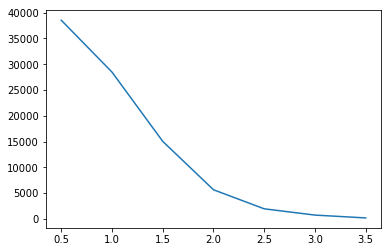

In [10]:
import matplotlib.pyplot as plt
error_vectors_list = [[element for element in error_vector[error_vector <= 0.5]]]
error_vectors_list.append([element for element in error_vector[(error_vector <= 1) & (error_vector > 0.5)]])
error_vectors_list.append([element for element in error_vector[(error_vector <= 1.5) & (error_vector > 1)]])
error_vectors_list.append([element for element in error_vector[(error_vector <= 2) & (error_vector > 1.5)]])
error_vectors_list.append([element for element in error_vector[(error_vector <= 2.5) & (error_vector > 2)]])
error_vectors_list.append([element for element in error_vector[(error_vector <= 3) & (error_vector > 2.5)]])
error_vectors_list.append([element for element in error_vector[(error_vector <= 3.5) & (error_vector > 3)]])

plt.plot([0.5, 1, 1.5, 2, 2.5, 3, 3.5], [len(element) for element in error_vectors_list])
plt.show()

# Item based Nearest Neighbourhood model

Central to most item-oriented approaches is a similarity measure
between items. Frequently, it is based on the Pearson correlation
coefficient, $\rho_{ij}$ , which measures the tendency of users to rate items
$i$ and $j$ similarly. Since many ratings are unknown, it is expected
that some items share only a handful of common raters. Computation
of the correlation coefficient is based only on the common user
support. Accordingly, similarities based on a greater user support
are more reliable. An appropriate similarity measure, denoted by
$s_{ij}$, would be a shrunk correlation coefficient

\begin{equation*}
s_{ij} = \frac{n_{ij}}{n_{ij} + \lambda_{2}} \cdot \rho_{ij}
\end{equation*}

Here, $\rho_{ij}$ is the <b>Pearson Corellation Coefficient</b> given by [(link)](http://www.cs.carleton.edu/cs_comps/0607/recommend/recommender/itembased.html)
\begin{equation*}
\rho_{ij} = \frac{\sum_{u \in U} (R_{u,i} - \overline R_i)(R_{u,j} - \overline R_j)}{\sqrt{\sum_{u \in U} (R_{u,i} - \overline R_i)^2} \sqrt{\sum_{u \in U} (R_{u,j} - \overline R_j)^2}}
\end{equation*}

$R_{u,i}$ is the rating that user $u$ has given to item $i$, and $\overline R_i$ is the average rating for item $i$

# Involving features for better similarity estimates

Though the Pearson Corellation coefficient is a very standard similarity measure, it does not include any information from the features already available. We have, in our dataset, information about the genre of each movies, and this should (intutively) be a very good addition to the similarity of two movies. To include this information in our model, we modify the Pearson Corellation Coefficient like follows

\begin{equation*}
\overline \rho_{ij} = w_1 \cdot \frac{\sum_{u \in U} (R_{u,i} - \overline R_i)(R_{u,j} - \overline R_j)}{\sqrt{\sum_{u \in U} (R_{u,i} - \overline R_i)^2} \sqrt{\sum_{u \in U} (R_{u,j} - \overline R_j)^2}} + w_2 \cdot G_{i,j}
\end{equation*}

Here, the term $G_{i,j}$ is the similarity of movies based only on the genres that the movies belong to. For example, the genres <b>Animation</b> and <b>Children's</b> are similar, but the genres <b>Action</b> and <b>Documentary</b> are quite different. This can also be seen from the movie genre data that we have

In [11]:
movies = pd.read_csv(os.path.join(root_dataset_folder, 'u.item'), sep='|', names=movie_columns, encoding='latin-1')
genre_matrix = movies.drop('movie_id', 1).drop('movie_title', 1).drop('release_date', 1).drop('video_release_date', 1).drop('IMDb_URL', 1).drop('unknown', 1)

In order to accomodate such observations into our estimate of $G_{ij}$, we need to build a model that encompasses such relations between genres. A model such as below should do well

\begin{equation*}
g_{ij} = \frac{w_1 \cdot (\# \; times \; g_i \; and \; g_j \; occured \; in \; the \; same \; movie) - w_2 \cdot (\# \; times \; only\; one \; of \; g_i \; and \; g_j \; occured \; in \; a \; movie)}
{max \; (g_{ij})}
\end{equation*}

This should give us a genre similarity rating between -1 and 1, <b>-1</b> being very different and <b>1</b> being very similar. We could then build a matrix that would give us the similarity between two genres. An upper triangular matrix of the form as show below should suffice

\begin{equation*}
    g = 
    \begin{pmatrix}
    0 & g_{01} & g_{02} & g_{03} & ... & g_{0,n-1} & g_{0n}\\
    0 & 0 & g_{12} & g_{13} &  ... & g_{1,n-1} & g_{1n}\\
    0 & 0 & 0 & g{23} & ... & g_{2,n-1} & g_{2n}\\
    \vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots\\
    0 & 0 & 0 & 0 & ... & g_{n-2,n-1} & g_{n-2,n}\\
    0 & 0 & 0 & 0 & ... & 0 & g_{n-1, n}
    \end{pmatrix}
\end{equation*}

In [12]:
# CONSTANTS
w1 = 1.0                    # amount of reward added when both ratings are 1
w2 = 0.675                  # amount of reward subtracted when one rating is 1 and another rating is 0
w3 = 0.3                    # amount of reward added when both ratings are 0

g_matrix = genre_matrix.values
g = np.array([np.array([0.0 for i in range(g_matrix.shape[1])]) for j in range(g_matrix.shape[1])])
count = 0
for movie_genres in g_matrix : 
    for i in range(len(movie_genres)) :
        for j in range(i+1, len(movie_genres)) : 
            ij = (movie_genres[i], movie_genres[j])
            if ij == (0, 1) or ij == (1, 0) :
                g[i][j] -= w2 * 1.0
            elif ij == (1, 1) : 
                g[i][j] += w1 * 1.0
            elif ij == (0, 0) : 
                g[i][j] += w3
            count += 1.0

# normalizing the g matrix with values between -1 and 1
max_val = max(g.min(), g.max(), key=abs)
for i in range(len(g)) : 
    for j in range(len(g)) : 
        g[i][j] /= max_val

After this, finding the value of $g_{ij}$ for a pair of movies $(i,j)$ is simply a matter of adding the $g_{mn}$ values of all the pair of genres $(m,n) \in (m \neq 0 \in genre-matrix[i], \; n \neq 0 \in genre-matrix[j])$ 

\begin{equation*}
G_{ij} = \frac{1}{N} \sum g_{mn} \; \forall \; \{(m,n) \; | \; m \neq 0 \in genre \; matrix[i], \; n \neq 0 \in genre \; matrix[j]\}
\end{equation*}

In [13]:
G = np.array([np.array([0.0 for i in range(g_matrix.shape[0])]) for j in range(g_matrix.shape[0])])

def G_ij(i, j) : 
    sum_ = 0
    genre_matrix_i = g_matrix[i]
    genre_matrix_j = g_matrix[j]
    count = 0
    for m in range(len(genre_matrix_i)) :
        ei = genre_matrix_i[m]
        if ei : 
            for n in range(len(genre_matrix_j)) :
                ej = genre_matrix_j[n]
                if ej : 
                    sum_ += g[m][n]
                    count += 1
    if count is not 0 : 
        sum_ /= count
    return sum_

for i in range(len(g_matrix)) : 
    for j in range(i+1, len(g_matrix)) : 
        G[i][j] = G_ij(i,j)

In [14]:
# for any movie-movie pair (i,j), n[i][j] will indicate the
# number of users that have rated both the movies
n = np.zeros((sparse_rating_matrix.shape[1], sparse_rating_matrix.shape[1]))
for i in range(sparse_rating_matrix.shape[1]) : 
    for j in range(i+1, sparse_rating_matrix.shape[1]) : 
        R_i = sparse_rating_matrix[:, i]
        R_j = sparse_rating_matrix[:, j]
        R_i = np.nan_to_num(R_i)
        R_j = np.nan_to_num(R_j)
        R_i[R_i != 0] = 1
        R_j[R_j != 0] = 1
        n[i][j] = np.dot(R_i, R_j)

In [15]:
def r(u, i) : 
    return sparse_rating_matrix[u][i]

# r_i
r_i_value = sparse_rating_matrix.mean(axis=0).tolist()
def r_i(u) : 
    return r_i_value[u]

In [16]:
rho = np.zeros((sparse_rating_matrix.shape[1], sparse_rating_matrix.shape[1]))
for i in range(sparse_rating_matrix.shape[1]) : 
    for j in range(i+1, sparse_rating_matrix.shape[1]) : 
        num = 0
        R_i = sparse_rating_matrix[:, i]
        R_i = R_i - np.nanmean(R_i, axis=0)
        R_j = sparse_rating_matrix[:, j]
        R_j = R_j - np.nanmean(R_j, axis=0)
        R_i = np.nan_to_num(R_i)
        R_j = np.nan_to_num(R_j)
        numerator = np.dot(R_i, R_j)
        denominator = np.dot(R_i, R_i) * np.dot(R_j, R_j)
        val = numerator/denominator
        if np.isnan(val) : 
            rho[i][j] = 0
        else :     
            rho[i][j] = val

/Users/ironstein/anaconda/envs/recommendation_engine/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in double_scalars
/Users/ironstein/anaconda/envs/recommendation_engine/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: Mean of empty slice
/Users/ironstein/anaconda/envs/recommendation_engine/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: Mean of empty slice


In [17]:
w1 = 1
w2 = 1
rho_ = (w1*rho) + (w2*G)

In [18]:
lambda_2 = 0
s = (n/(n + 100)) * rho_

# Recommendation for a user

Our goal is to predict rui – the unobserved rating by user u for
item i. Using the similarity measure, we identify the k items rated
by u, which are most similar to i. This set of k neighbors is denoted
by $S^k_{(i; u)}$. The predicted value of rui is taken as a weighted average
of the ratings of neighboring items, while adjusting for user
and item effects through the baseline estimates:
$rˆ_{ui} = b_{ui} + \frac{\sum{j∈S_k(i;u)} s_{ij} (r_{uj} − b_{uj} )}{j \in S^k_{(i;u)} s_{ij}}$

In [19]:
sparse_rating_matrix = pd.DataFrame(data=ratings,index=users['user_id'],columns=movies['movie_id'])
sparse_rating_matrix = sparse_rating_matrix.replace('0',np.nan)
sparse_rating_matrix = sparse_rating_matrix.values
k = 15 # number of nearest neighbours to consider for each movie

# returns the indices of k max elements in the array 
# @param {k} : number of indices to return
# @param {array} : the array in which to look for the k max elements
def k_max_indices(array, k) : 
    return_array = []
    for i in range(k) : 
        max_ = -1000
        max_index = -1
        for j in range(len(array)) : 
            if array[j] > max_ and j not in return_array : 
                max_ = array[j]
                max_index = j
        return_array.append(max_index)
    return return_array

# returns the k most similar movies to the movie "i"
# @param {k} : the number of nearest neighbours to return
# @param {i} : the movie for which to look for nearest neighbours
def knn(k, i) :
    row = s[i][i+1:].tolist()
    array = s[:,i][:i].tolist()
    array.append(0)
    array.extend(row)
    return k_max_indices(array, k)

# takes in a user id, and looks at the 5 highest rated movies by that user
# then, finds k nearest neighbours for all the 5 movies and returns the
# 5 highest rated movies from that list
# @param {user_id} : the user for whom to recommend movies
def recommend(user_id) : 
    user_rating_matrix = sparse_rating_matrix[user_id]
    user_rating_matrix[user_rating_matrix == np.nan] = 0
    max_user_rating_matrix = k_max_indices(user_rating_matrix, 5)
    m = []
    for element in max_user_rating_matrix : 
        m.extend([[element, e] for e in knn(5, element)])
    m_ = [s[u,v] for u,v in m]
    m_ = k_max_indices(m_, k)[7:12]
    m = [m[element] for element in m_]
    recommended_movies_array = []
    with open(os.path.join(root_dataset_folder, 'u.item'), 'r') as f : 
        data = f.read().split('\n')
        for movie in m : 
            recommended_movies_array.append(data[movie[1]].split('|')[1])
    return recommended_movies_array

In [20]:
recommend(104)

['Game, The (1997)',
 'Tombstone (1993)',
 "Singin' in the Rain (1952)",
 'My Fair Lady (1964)',
 'Annie Hall (1977)']